In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import Imputer

C:\Users\Siddi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Siddi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_data_df=pd.read_csv('train_set.csv')
test_data_df=pd.read_csv('test_set.csv')

In [38]:
test_set=test_data_df.values

In [37]:
test_orig=pd.read_csv('test.csv')
submission_df=pd.DataFrame(columns=['card_id','target'])
submission_df['card_id']=test_orig['card_id']

In [4]:
train_orig=pd.read_csv('train.csv')
train_labels=train_orig['target']

In [6]:
train_labels.shape

(201917,)

In [7]:
train_data_df.shape

(201917, 378)

In [8]:
play_ground=pd.concat([train_data_df,train_labels],axis=1)

In [12]:
play_ground[play_ground['target']<-10].head(2)

,0,1,3,5,6,7,8,9,10,13,...,379,380,381,382,383,384,385,386,387,target
64,0.589149,-0.117859,0.152956,-0.333469,0.062942,0.140756,-0.208844,0.701870,-0.002708,0.177457,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-33.219281
92,-1.597649,-0.490565,-0.760018,-0.420192,-0.721684,-0.641142,-0.371417,-1.462928,-0.002855,-1.141235,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-33.219281


In [13]:
play_ground[play_ground['target']<1].head(2)

,0,1,3,5,6,7,8,9,10,13,...,379,380,381,382,383,384,385,386,387,target
0,0.516844,1.630996,-0.746499,0.996294,1.980917,1.965184,0.604022,-0.033222,-0.002778,0.177457,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.820283
1,0.656461,2.510201,0.625491,0.793939,3.375808,3.528981,0.400805,-0.552516,-0.002743,0.177457,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.392913


C:\Users\Siddi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


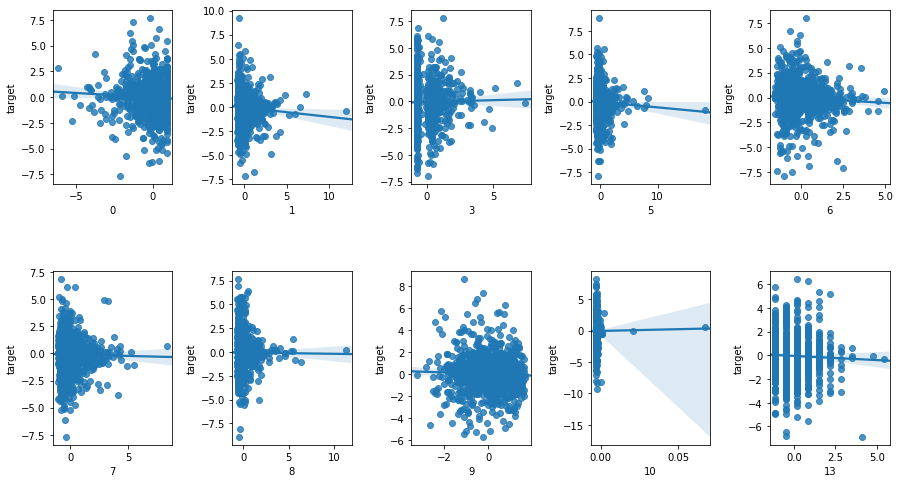

In [25]:
import matplotlib.ticker as ticker
fig = plt.figure(figsize=(15,8))
grid = plt.GridSpec(2, 5, wspace=0.5, hspace=0.5)
plt.subplot(grid[0, 0])
dfSample = play_ground.sample(1000) # This is the importante line
xdataSample, ydataSample = dfSample["0"], dfSample["target"]
sns.regplot(x=xdataSample, y=ydataSample) 
plt.subplot(grid[0, 1])
dfSample = play_ground.sample(1000) # This is the importante line
xdataSample, ydataSample = dfSample["1"], dfSample["target"]
sns.regplot(x=xdataSample, y=ydataSample) 
plt.subplot(grid[0, 2])
dfSample = play_ground.sample(1000) # This is the importante line
xdataSample, ydataSample = dfSample["3"], dfSample["target"]
sns.regplot(x=xdataSample, y=ydataSample) 
plt.subplot(grid[0, 3])
dfSample = play_ground.sample(1000) # This is the importante line
xdataSample, ydataSample = dfSample["5"], dfSample["target"]
sns.regplot(x=xdataSample, y=ydataSample) 
plt.subplot(grid[0, 4])
dfSample = play_ground.sample(1000) # This is the importante line
xdataSample, ydataSample = dfSample["6"], dfSample["target"]
sns.regplot(x=xdataSample, y=ydataSample)
plt.subplot(grid[1, 0])
dfSample = play_ground.sample(1000) # This is the importante line
xdataSample, ydataSample = dfSample["7"], dfSample["target"]
sns.regplot(x=xdataSample, y=ydataSample) 
plt.subplot(grid[1, 1])
dfSample = play_ground.sample(1000) # This is the importante line
xdataSample, ydataSample = dfSample["8"], dfSample["target"]
sns.regplot(x=xdataSample, y=ydataSample) 
plt.subplot(grid[1, 2])
dfSample = play_ground.sample(1000) # This is the importante line
xdataSample, ydataSample = dfSample["9"], dfSample["target"]
sns.regplot(x=xdataSample, y=ydataSample) 
plt.subplot(grid[1, 3])
dfSample = play_ground.sample(1000) # This is the importante line
xdataSample, ydataSample = dfSample["10"], dfSample["target"]
sns.regplot(x=xdataSample, y=ydataSample) 
plt.subplot(grid[1, 4])
dfSample = play_ground.sample(1000) # This is the importante line
xdataSample, ydataSample = dfSample["13"], dfSample["target"]
sns.regplot(x=xdataSample, y=ydataSample)
plt.show()

In [23]:
play_ground['target'].median()

-0.02343689

In [24]:
play_ground.loc[(play_ground['target']>10)|(play_ground['target']<-10),'target']=play_ground['target'].median()

In [107]:
model = RandomForestRegressor(n_estimators=100, random_state=10, 
                               n_jobs = -1)

In [27]:
train_labels=play_ground['target'].values

In [29]:
play_ground=play_ground.drop(['target'],axis=1)

In [30]:
train_set=play_ground.values

In [32]:
train_labels.shape

(201917,)

In [33]:
cv_score = cross_val_score(model, train_set, train_labels, cv = 5, scoring = 'mean_squared_error')

C:\Users\Siddi\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Siddi\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Siddi\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Siddi\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Siddi\Anaconda3\lib\sit

In [35]:
print(f'5 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

5 Fold Cross Validation F1 Score = -2.8563 with std = 0.0309


In [108]:
model.fit(train_set, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [109]:
test_labels=model.predict(test_set)

In [110]:
submission_df['target']=test_labels

In [111]:
submission_df.target = submission_df.target.round(2)
submission_df.to_csv('submission_3.csv',index=False)

In [43]:
from sklearn.externals import joblib

In [44]:
filename = './Base_RF_imputed_Outliers_No_FS.joblib.pkl'
_ = joblib.dump(model, filename, compress=9)

In [45]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 5, scoring='mean_squared_error', n_jobs = -1)
    print(f'5 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [47]:
from sklearn.neural_network import MLPRegressor
model_results = cv_model(train_set, train_labels, 
                         MLPRegressor(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

5 Fold CV Score: -3.52209 with std: 0.1239


In [ ]:
dfSample

In [51]:
train_labels_2=train_orig['target']
play_ground=pd.concat([train_data_df,train_labels_2],axis=1)
dfSample = play_ground.sample(5000)
train_sample_label=dfSample['target'].values
dfSample=dfSample.drop(['target'],axis=1)
train_sample=dfSample.values
from sklearn.feature_selection import RFECV
estimator = RandomForestRegressor(random_state = 10, n_estimators = 100,  n_jobs = -1)
selector = RFECV(estimator, step = 1, cv = 3, scoring= 'mean_squared_error', n_jobs = -1,verbose=1)
selector.fit(train_sample, train_sample_label)

RFECV(cv=3,
   estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False),
   n_jobs=-1, scoring='mean_squared_error', step=1, verbose=1)

In [71]:
dfSample.shape

(5000, 378)

5

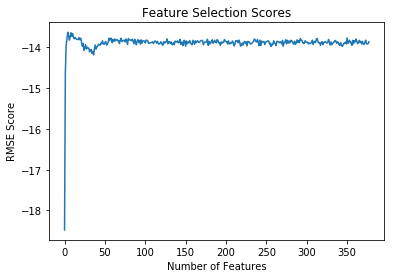

In [53]:
plt.plot(selector.grid_scores_);

plt.xlabel('Number of Features'); plt.ylabel('RMSE Score'); plt.title('Feature Selection Scores');
selector.n_features_

In [58]:
rankings = pd.DataFrame({'feature': list(dfSample.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

,feature,rank
0,0,1
17,22,1
16,21,1
8,10,1
13,18,1
7,9,2
1,1,3
2,3,4
14,19,5
12,17,6


In [59]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [60]:
selected_features = dfSample.columns[np.where(selector.ranking_==1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [62]:
test_selected.shape

(123623, 5)

In [63]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

5 Fold CV Score: -2.97184 with std: 0.03564


In [106]:
model.fit(train_selected, train_labels)

KeyboardInterrupt: 

In [66]:
test_labels=model.predict(test_selected)
submission_df['target']=test_labels
submission_df.target = submission_df.target.round(2)
submission_df.to_csv('submission_3.csv',index=False)

In [73]:
from sklearn.model_selection import KFold
import lightgbm as lgb
from IPython.display import display

In [92]:
def model_gbm(features, labels, test_features, test_ids, 
              nfolds = 5, return_preds = False, hyp = None):
    """Model using the GBM and cross validation.
       Trains with early stopping on each fold.
       Hyperparameters probably need to be tuned."""
    
    feature_names = list(features.columns)# dataframe with training dataset

    # Option for user specified hyperparameters
    if hyp is not None:
        # Using early stopping so do not need number of esimators
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp
    
    else:
        # Model hyperparameters
        params = {'boosting_type': 'dart', 
                  'colsample_bytree': 0.88, 
                  'learning_rate': 0.028, 
                   'min_child_samples': 10, 
                   'num_leaves': 36, 'reg_alpha': 0.76, 
                   'reg_lambda': 0.43, 
                   'subsample_for_bin': 40000, 
                   'subsample': 0.54, 
                   'class_weight': 'balanced'}
    
    # Build the model
    model = lgb.LGBMRegressor(**params, objective = 'regression', 
                               n_jobs = -1, n_estimators = 10000,
                               random_state = 10)
    
    # Using stratified kfold cross validation
    strkfold = KFold(n_splits = nfolds, shuffle = True)
    
    # Hold all the predictions from each fold
    predictions = pd.DataFrame()
    submission=pd.DataFrame()
    importances = np.zeros(len(feature_names))
    
    # Convert to arrays for indexing
    features = np.array(features)
    test_features = np.array(test_features) #Test dataframe
    labels = np.array(labels).reshape((-1 ))
    
    valid_scores = []
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        # Dataframe for fold predictions
        fold_predictions = pd.DataFrame()
        
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = 'mean_squared_error',
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 200)
        #print(model.best_score_)
        # Record the validation fold score
        valid_scores.append(model.best_score_['valid']['l2'])
        
        # Make predictions from the fold as probabilities
        #fold_predictions['preds'] = model.predict(test_features)
        
        # Record each prediction for each class as a separate column
        #for j in range(4):
        #    fold_predictions[(j + 1)] = fold_probabilitites[:, j]
            
        # Add needed information for predictions 
        #fold_predictions['card_id'] = test_ids
        #fold_predictions['fold'] = (i+1)
        
        
        # Add the predictions as new rows to the existing predictions
        #predictions = predictions.append(fold_predictions)
        
        # Feature importances
        importances += model.feature_importances_ / nfolds   
        
        # Display fold information
        display(f'Fold {i + 1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    # Feature importances dataframe
    feature_importances = pd.DataFrame({'feature': feature_names,
                                        'importance': importances})
    
    valid_scores = np.array(valid_scores)
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}.')
    
    # If we want to examine predictions don't average over folds
    if return_preds:
        predictions['target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
        #predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
        return predictions, feature_importances
    
    # Average the predictions over folds
    #predictions = predictions.groupby('card_id', as_index = False).mean()
    #print (predictions)
    # Find the class and associated probability
    #predictions['target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
    #predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
    #predictions = predictions.drop(columns = ['fold'])
    
    # Merge with the base to have one prediction for each individual
    #submission = submission_base.merge(predictions[['card_id', 'target']], on = 'card_id', how = 'left').drop(columns = ['card_id'])
    # Fill in the individuals that do not have a head of household with 4 since these will not be scored
    #submission['target'] = submission['target'].fillna(4).astype(np.int8)
    
    # return the submission and feature importances along with validation scores
    return submission, feature_importances, valid_scores

In [93]:
submission, feature_importances, valid_scores = model_gbm(train_selected, train_labels, test_selected, submission_df['card_id'], return_preds=False)

Training until validation scores don't improve for 100 rounds.
[200]	train's l2: 2.81498	train's l2: 2.81498	valid's l2: 2.85223	valid's l2: 2.85223
[400]	train's l2: 2.80626	train's l2: 2.80626	valid's l2: 2.8521	valid's l2: 2.8521
Early stopping, best iteration is:
[332]	train's l2: 2.80899	train's l2: 2.80899	valid's l2: 2.85187	valid's l2: 2.85187


'Fold 1, Validation Score: 2.85187, Estimators Trained: 332'

Training until validation scores don't improve for 100 rounds.
[200]	train's l2: 2.82395	train's l2: 2.82395	valid's l2: 2.81494	valid's l2: 2.81494
Early stopping, best iteration is:
[272]	train's l2: 2.81938	train's l2: 2.81938	valid's l2: 2.81475	valid's l2: 2.81475


'Fold 2, Validation Score: 2.81475, Estimators Trained: 272'

Training until validation scores don't improve for 100 rounds.
[200]	train's l2: 2.82174	train's l2: 2.82174	valid's l2: 2.82531	valid's l2: 2.82531
[400]	train's l2: 2.8126	train's l2: 2.8126	valid's l2: 2.82493	valid's l2: 2.82493
Early stopping, best iteration is:
[495]	train's l2: 2.80524	train's l2: 2.80524	valid's l2: 2.82465	valid's l2: 2.82465


'Fold 3, Validation Score: 2.82465, Estimators Trained: 495'

Training until validation scores don't improve for 100 rounds.
[200]	train's l2: 2.81313	train's l2: 2.81313	valid's l2: 2.85935	valid's l2: 2.85935
Early stopping, best iteration is:
[128]	train's l2: 2.81466	train's l2: 2.81466	valid's l2: 2.85924	valid's l2: 2.85924


'Fold 4, Validation Score: 2.85924, Estimators Trained: 128'

Training until validation scores don't improve for 100 rounds.
[200]	train's l2: 2.82501	train's l2: 2.82501	valid's l2: 2.8125	valid's l2: 2.8125
Early stopping, best iteration is:
[258]	train's l2: 2.82105	train's l2: 2.82105	valid's l2: 2.81218	valid's l2: 2.81218


'Fold 5, Validation Score: 2.81218, Estimators Trained: 258'

'5 cross validation score: 2.83254 with std: 0.01939.'

In [112]:
params = {'boosting_type': 'dart', 
                  'colsample_bytree': 0.88, 
                  'learning_rate': 0.028, 
                   'min_child_samples': 10, 
                   'num_leaves': 36, 'reg_alpha': 0.76, 
                   'reg_lambda': 0.43, 
                   'subsample_for_bin': 40000, 
                   'subsample': 0.54, 
                   'class_weight': 'balanced'}
    
    # Build the model
model = lgb.LGBMRegressor(**params, objective = 'regression', n_jobs = -1, n_estimators = 10000,random_state = 10)
model.fit(train_set, train_labels,verbose = 200)

LGBMRegressor(boosting_type='dart', class_weight='balanced',
       colsample_bytree=0.88, importance_type='split', learning_rate=0.028,
       max_depth=-1, min_child_samples=10, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=36,
       objective='regression', random_state=10, reg_alpha=0.76,
       reg_lambda=0.43, silent=True, subsample=0.54,
       subsample_for_bin=40000, subsample_freq=0)

In [101]:
model

LGBMRegressor(boosting_type='dart', class_weight='balanced',
       colsample_bytree=0.88, importance_type='split', learning_rate=0.028,
       max_depth=-1, min_child_samples=10, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=36,
       objective='regression', random_state=10, reg_alpha=0.76,
       reg_lambda=0.43, silent=True, subsample=0.54,
       subsample_for_bin=40000, subsample_freq=0)

In [113]:
test_labels=model.predict(test_set)
submission_df['target']=test_labels
submission_df.target = submission_df.target.round(2)
submission_df.to_csv('submission_5.csv',index=False)

In [104]:
submission_df[submission_df['target']>2]

,card_id,target
20473,C_ID_84f721982b,2.13
49086,C_ID_c5f343ac31,2.06
73860,C_ID_591ae38574,2.44
79822,C_ID_1c9916a4d8,2.88
83041,C_ID_9c70210f86,2.37
92082,C_ID_7983dfa901,2.73
109720,C_ID_4a08435fbb,2.48
117839,C_ID_5f9c95fd1b,2.42
120136,C_ID_cc2ce74060,2.58
120225,C_ID_879379db88,2.57
